In [24]:
import pandas as pd

# Memuat dataset
data = pd.read_csv('datapemilukpu.csv')


In [25]:
print(data.head())
print(data.info())  # Memeriksa tipe data dan nilai yang hilang


   NAMA PARTAI POLITIK        NAMA CALON LEGESLATIF JENIS KELAMIN  KECAMATAN  \
0  HATI NURANI RAKYAT              TOTO SUKISNO,BSc             L   LEBAKSIU   
1  HATI NURANI RAKYAT               EDI PURYANTO,SH             L      SLAWI   
2  HATI NURANI RAKYAT              ELI RETNOWATI,SH             P      SLAWI   
3  HATI NURANI RAKYAT                      SAHYUDIN             L  DUKUHWARU   
4  HATI NURANI RAKYAT   H.FAJAR SIGIT KUSUMAJAYA,SH             L      SLAWI   

   NO.URUT PARPOL  SUARA SAH PARTAI  JUML.PEROLEHAN KURSI  DAERAH PEMILIHAN  \
0               1             18578                     1                 1   
1               1             18578                     1                 1   
2               1             18578                     1                 1   
3               1             18578                     1                 1   
4               1             18578                     1                 2   

  NO.URUT CALEG  SUARA SAH CALEG TERPILIH AT

In [26]:
# Mengubah kolom kategori menjadi numerik
data['TERPILIH ATAU TIDAK'] = data['TERPILIH ATAU TIDAK'].map({'YA': 1, 'TIDAK': 0})

# Menghapus kolom yang tidak diperlukan
data = data.drop(columns=['NAMA PARTAI POLITIK', 'NAMA CALON LEGESLATIF'])

# Memeriksa nilai yang hilang
print(data.isnull().sum())

# Menghapus baris dengan nilai yang hilang (jika ada)
data = data.dropna()

# Melakukan One-Hot Encoding pada kolom kategorikal
data = pd.get_dummies(data, drop_first=True)

# Memisahkan fitur dan target
X = data.drop(columns=['TERPILIH ATAU TIDAK'])
y = data['TERPILIH ATAU TIDAK']


JENIS KELAMIN           1
KECAMATAN               0
NO.URUT PARPOL          0
SUARA SAH PARTAI        0
JUML.PEROLEHAN KURSI    0
DAERAH PEMILIHAN        0
NO.URUT CALEG           4
SUARA SAH CALEG         0
TERPILIH ATAU TIDAK     0
dtype: int64


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [29]:
from sklearn.metrics import accuracy_score, classification_report

# Melakukan prediksi
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))


Akurasi: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        68
           1       0.83      0.31      0.45        16

    accuracy                           0.86        84
   macro avg       0.85      0.65      0.69        84
weighted avg       0.85      0.86      0.83        84



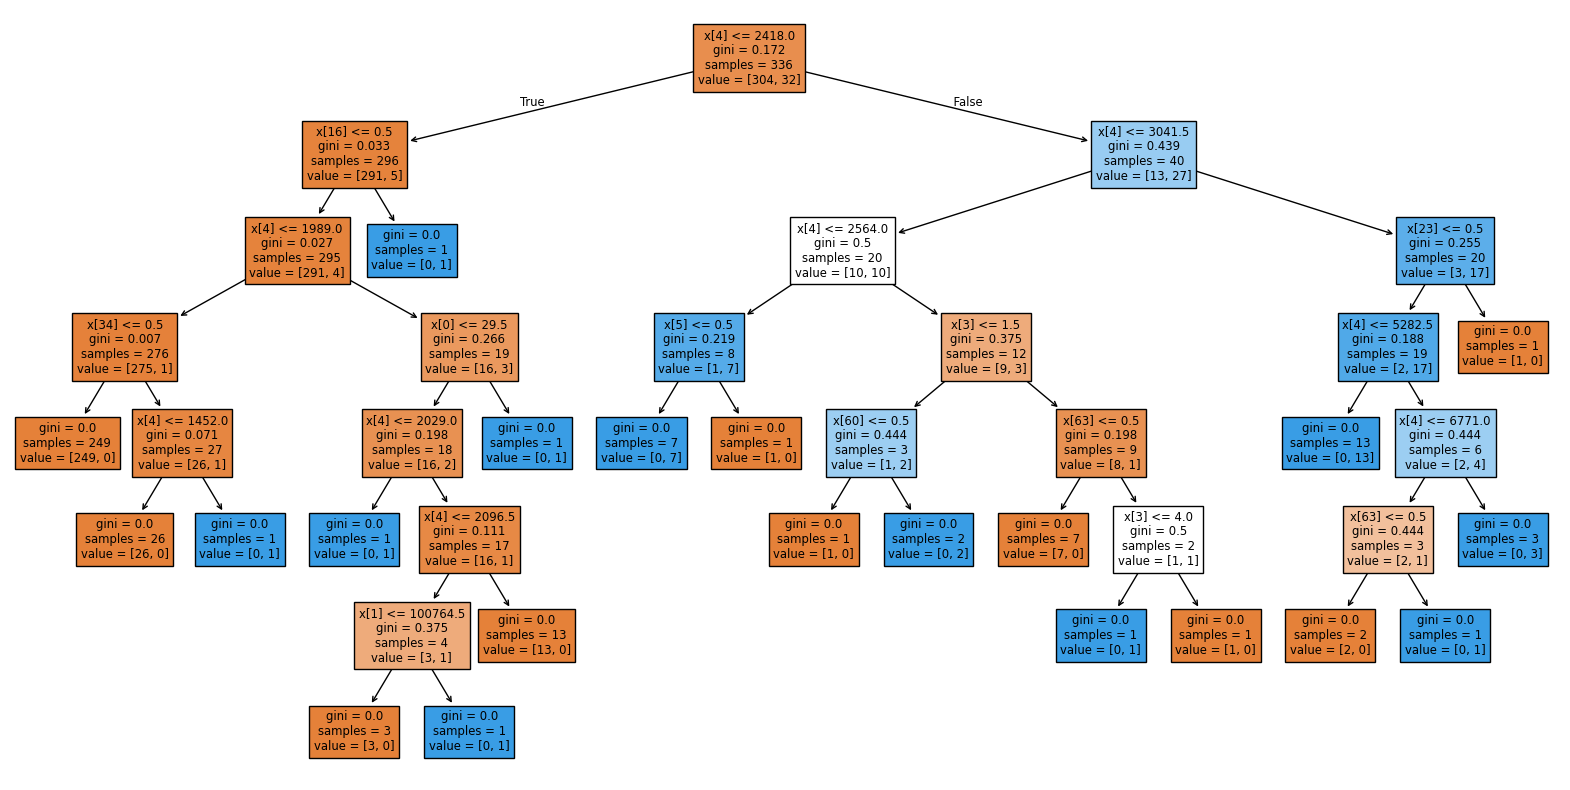

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, filled=True)
plt.show()
